# Multiespetral Image 

In [2]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from sklearn.cluster import KMeans

# Ruta de la imagen TIFF 
ruta_imagen1 = "dnir.tif"
ruta_imagen2 = "dred.tif"
ruta_imagen3 = "dgre.tif"
ruta_imagen4 = "dreg.tif"

# Carga la imagen TIFF
nir_image = tifffile.imread(ruta_imagen1)
red_image = tifffile.imread(ruta_imagen2)
green_image = tifffile.imread(ruta_imagen3)
red_edge_image = tifffile.imread(ruta_imagen4)

# Muestra información sobre la imagen
print("Dimensiones de la imagen:", nir_image.shape)
print("Tipo de datos de la imagen:", nir_image.dtype)

print("Dimensiones de la imagen:", red_image.shape)
print("Tipo de datos de la imagen:", red_image.dtype)

print("Dimensiones de la imagen:", green_image.shape)
print("Tipo de datos de la imagen:", green_image.dtype)

print("Dimensiones de la imagen:", red_edge_image.shape)
print("Tipo de datos de la imagen:", red_edge_image.dtype)

Dimensiones de la imagen: (2100, 2807)
Tipo de datos de la imagen: uint16
Dimensiones de la imagen: (2100, 2807)
Tipo de datos de la imagen: uint16
Dimensiones de la imagen: (2100, 2807)
Tipo de datos de la imagen: uint16
Dimensiones de la imagen: (2100, 2807)
Tipo de datos de la imagen: uint16


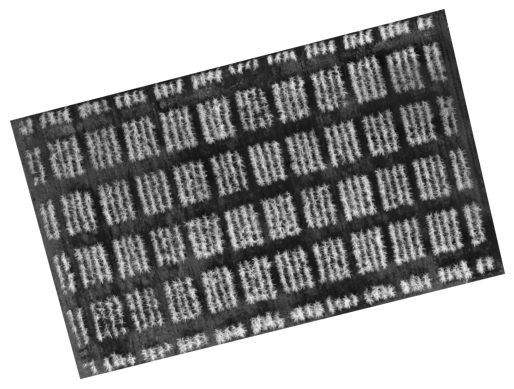

In [7]:
# Mostrar la imagen
plt.imshow(nir_image, cmap='gray')
plt.axis('off')
plt.show()

# GBR

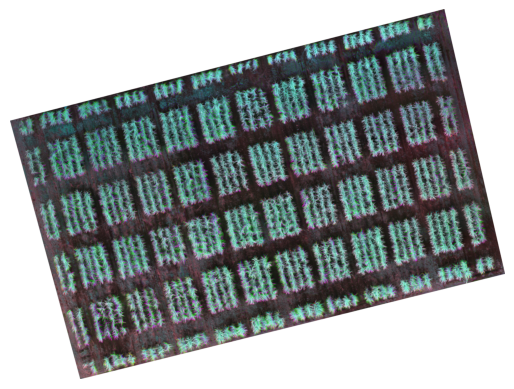

In [12]:
# Normalizar las bandas (opcional)
nir_image = (nir_image - np.min(nir_image)) / (np.max(nir_image) - np.min(nir_image))
red_image = (red_image - np.min(red_image)) / (np.max(red_image) - np.min(red_image))
green_image = (green_image - np.min(green_image)) / (np.max(green_image) - np.min(green_image))
red_edge_image = (red_edge_image - np.min(red_edge_image)) / (np.max(red_edge_image) - np.min(red_edge_image))

# Combinar las bandas en una imagen compuesta (RGB)
#rgb_image = np.dstack((red_image, green_image, nir_image))

gbr_image = np.dstack((green_image, nir_image, red_edge_image))

# Mostrar la imagen compuesta
plt.imshow(gbr_image)
plt.axis('off')
plt.show()

# Guardar la imagen apilada
tifffile.imwrite('gbr_image1.tif', rgb_image)

# Vegetation Index

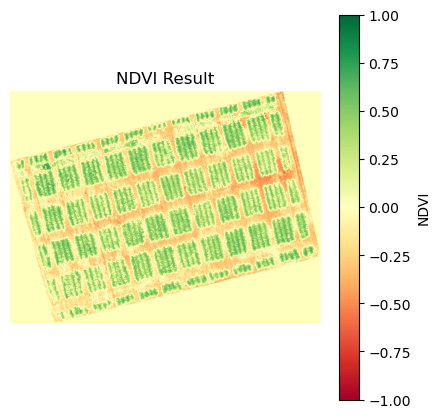

In [19]:
# Convertir los datos a tipo de datos de punto flotante (float)
red_band = red_band.astype(float)
nir_band = nir_band.astype(float)

# Calcular el NDVI
ndvi = (nir_band - red_band) / (nir_band + red_band)

# Guardar el resultado del NDVI en un archivo
np.save('ndvi_result.npy', ndvi)

# Escalar el NDVI al rango uint16
ndvi_scaled = np.interp(ndvi, (-1, 1), (0, 65535)).astype(np.uint16)

# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('ndvi_result.tif', ndvi_scaled)

# Graficar el NDVI
plt.figure(figsize=(5, 5))
plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='NDVI')
plt.title('NDVI Result')
plt.axis('off')
plt.show()

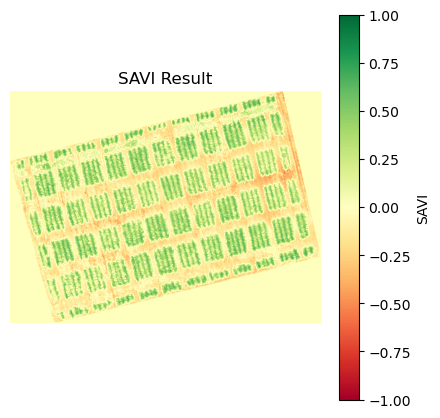

In [18]:
# Calcular el Índice SAVI
L = 0.5
savi = ((nir_band - red_band) / (nir_band + red_band + L)) * (1 + L)

# Escalar el SAVI al rango uint16
savi_scaled = np.interp(savi, (-1, 1), (0, 65535)).astype(np.uint16)

# Guardar el resultado del SAVI en un archivo
np.save('savi_result.npy', savi)

# Guardar el resultado del SAVI en un archivo TIFF
tifffile.imsave('savi_result.tif', savi_scaled)

# Mostrar el resultado
plt.figure(figsize=(5, 5))
plt.imshow(savi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='SAVI')
plt.title('SAVI Result')
plt.axis("off")
plt.show()

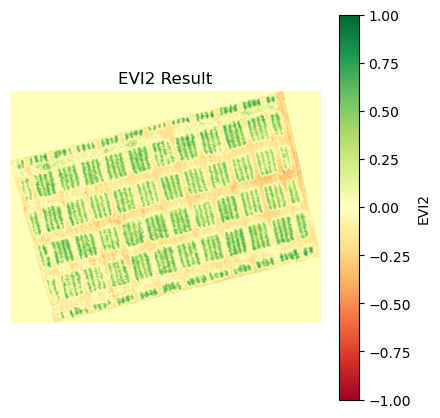

In [21]:
# Calcular el Índice EVI2
evi2 = 2.5 * ((nir_band - red_band) / (nir_band + 2.4 * red_band + 1))

# Escalar el evi2 al rango uint16
evi2_scaled = np.interp(evi2, (-1, 1), (0, 65535)).astype(np.uint16)

# Guardar el resultado del evi2 en un archivo TIFF
tifffile.imsave('evi2_result.tif', evi2_scaled)

# Guardar el resultado del evi2 en un archivo
np.save('evi2_result.npy', evi2)

# Mostrar el resultado
plt.figure(figsize=(5, 5))
plt.imshow(evi2, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='EVI2')
plt.title('EVI2 Result')
plt.axis("off")
plt.show()

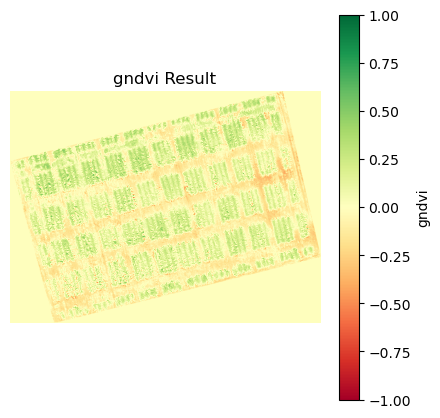

In [24]:
# Convertir los datos a tipo de datos de punto flotante (float)
verde_band = green_image.astype(float)

# Calcular el GNDVI
gndvi = (nir_band - verde_band) / (nir_band + verde_band)

# Escalar el GNDVI al rango uint16
gndvi_scaled = np.interp(gndvi, (-1, 1), (0, 65535)).astype(np.uint16)

# Guardar el resultado del GNDVI en un archivo
tifffile.imsave('gndvi_result.tif', gndvi_scaled)

# Guardar el resultado del GNDVI en un archivo
np.save('gndvi_result.npy', gndvi)

# Mostrar el resultado
plt.figure(figsize=(5, 5))
plt.imshow(gndvi, cmap='RdYlGn', vmin=-1, vmax=1)
plt.colorbar(label='gndvi')
plt.axis("off")
plt.title('gndvi Result')
plt.show()


# OTSU Segmentation

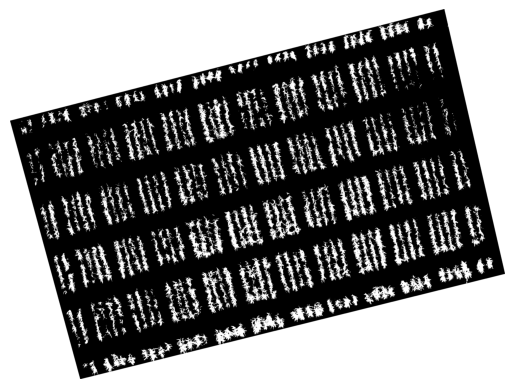

In [27]:
# Leer la imagen
imagen = cv2.imread(ruta_imagen1, cv2.IMREAD_UNCHANGED)

# Aplicar el método de Otsu
_, nir_binary = cv2.threshold(imagen, 0, 65535, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('nir_binary_result.tif', nir_binary)

# Mostrar la imagen
plt.imshow(nir_binary, cmap='gray')
plt.axis('off')
plt.show()

# Clustering: K-means. Segmentation

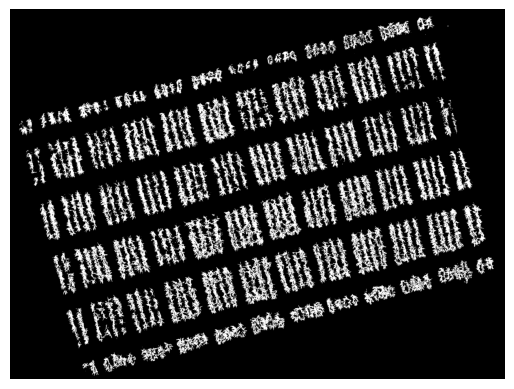

In [46]:
# Obtener las dimensiones de la imagen
height, width = nir_image.shape

# Reshape la imagen para tener una matriz de píxeles
pixels = nir_image.reshape(-1, 1)

# Definir el número de clusters (2 en este caso para separar cultivo y suelo)
n_clusters = 4

# Aplicar K-Means para agrupar los píxeles
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
kmeans.fit(pixels)
# Obtener las etiquetas de los clusters asignados a cada píxel
labels = kmeans.labels_

# Asignar etiquetas binarias (0 para cultivo y 65535 para suelo)
segmented_image = np.zeros_like(pixels, dtype=np.uint16)
cultivo_label = np.argmin(np.bincount(labels))  # Determinar la etiqueta del cultivo
segmented_image[labels == cultivo_label] = 65535  # Asignar 65535 a los píxeles del cultivo

# Reshape la imagen segmentada a las dimensiones originales
segmented_image = segmented_image.reshape(height, width)

# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('segmented_image_result4.tif', segmented_image)

# Mostrar la imagen segmentada
plt.imshow(segmented_image, cmap='gray')
plt.axis('off')
plt.show()


# Stress Crop NDVI

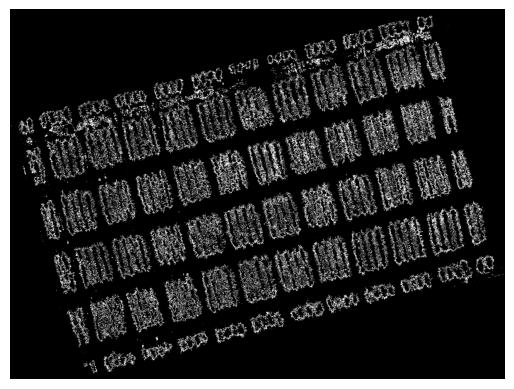

In [33]:
stress = np.where(np.logical_and(0.21 <= ndvi, ndvi < 0.39), 65535, 0)

# Escalar el NDVI al rango uint16
stress_scaled = np.interp(stress, (-1, 1), (0, 65535)).astype(np.uint16)

# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('stress_result.tif', stress_scaled)

# Mostrar la imagen
plt.imshow(stress, cmap='gray')
plt.axis('off')
plt.show()

# Healthy Crop NDVI

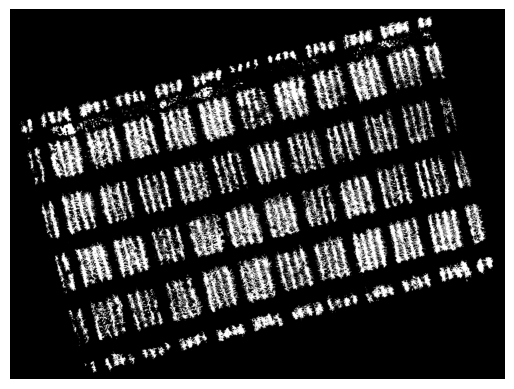

In [34]:
no_stress = np.where(ndvi >= 0.39, 65535, 0)

# Escalar el NDVI al rango uint16
no_stress_scaled = np.interp(stress, (-1, 1), (0, 65535)).astype(np.uint16)

# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('no_stress_result.tif', no_stress_scaled)

# Mostrar la imagen
plt.imshow(no_stress, cmap='gray')
plt.axis('off')
plt.show()


#  Crop healthy interest

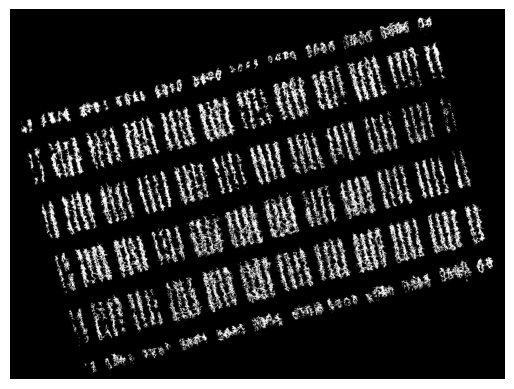

In [37]:
# LIMITACION DE INTERES DEL CULTIVO SALUDABLE
sano = np.where(np.logical_and(no_stress == 65535, segmented_image == 65535), 65535, 0)

# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('no_stress1.tif', sano)

plt.imshow(sano, cmap='gray')
plt.axis("off")
plt.show() 


#  Crop stress interest

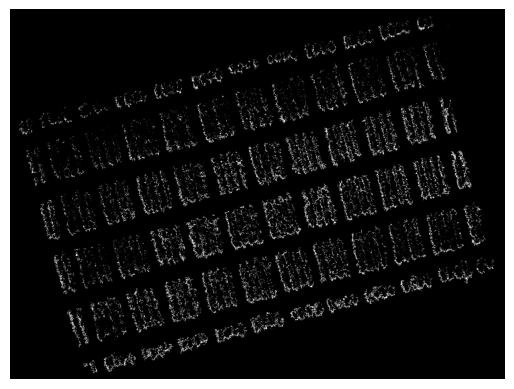

In [38]:
# LIMITACION DE INTERES DEL CULTIVO ESTRESADO
no_sano = np.where(np.logical_and( stress==65535, segmented_image==65535), 65535, 0)

# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('stress1.tif', sano)

plt.imshow(no_sano, cmap='gray')
plt.axis("off")
plt.show()

# Final Image


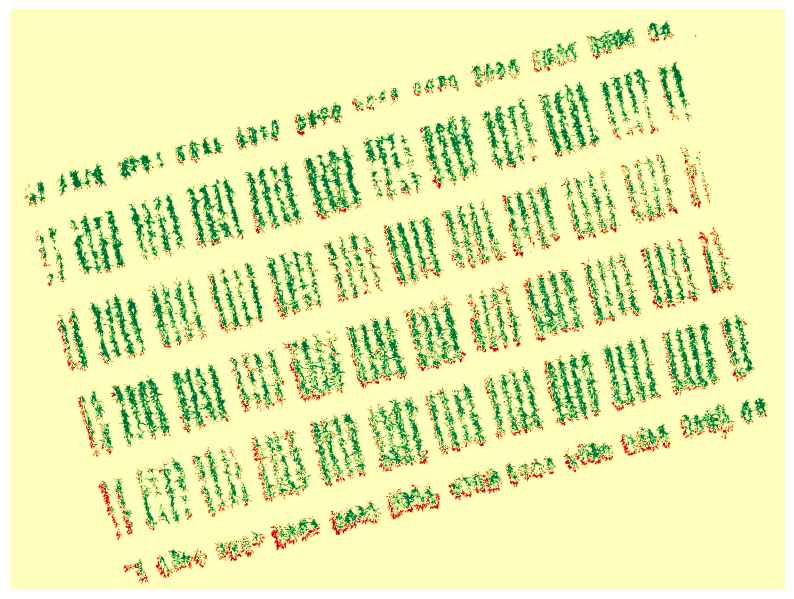

In [42]:
# Obtener una máscara del fondo blanco
mascara = np.where(imagen == 65535, 0, imagen)

# LIMITACION DE INTERES DEL CULTIVO SALUDABLE
sano = np.where(np.logical_or(segmented_image != 65535, mascara == 0), 0,  np.where(ndvi >= 0.39, 1, -1))


# Guardar el resultado del NDVI en un archivo TIFF
tifffile.imsave('s_result.tif', sano)

# Graficar el NDVI
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.imshow(sano, cmap='RdYlGn')